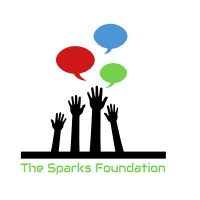

# Task 1 : Prediction using Supervised ML (Level - Beginner)

## Problem Statement:
What will be predicted score if a student studies for 9.25 hrs/ day?

## Author: Sounak Bhattacharya

The Sparks Foundation: Data Science & Business Analytics Internship

## Reading and Understanding the Data
Let's start with the following steps:

Importing important libraries

Importing data using the pandas library

Understanding the structure of the data by performing basic EDA

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px 

In [2]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_csv("file1.csv")
df.head()

,Unnamed: 0,Hours,Scores
0,0,2.5,21
1,1,5.1,47
2,2,3.2,27
3,3,8.5,75
4,4,3.5,30


In [5]:
df.shape

(25, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   Hours       25 non-null     float64
 2   Scores      25 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


In [7]:
df.describe()

,Unnamed: 0,Hours,Scores
count,25.000000,25.000000,25.000000
mean,12.000000,5.012000,51.480000
std,7.359801,2.525094,25.286887
min,0.000000,1.100000,17.000000
25%,6.000000,2.700000,30.000000
50%,12.000000,4.800000,47.000000
75%,18.000000,7.400000,75.000000
max,24.000000,9.200000,95.000000


## Visualising the Data

In [8]:
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "iframe"

In [9]:
fig = px.scatter(df, x="Hours", y="Scores",width=800, height=400) 
  
# showing the plot
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [10]:
fig = px.imshow(df, text_auto=True,width=800, height=700)
fig.show()

## Splitting dataset into the dependent and independent variable

In [11]:
X = df[['Hours']]
y = df['Scores']

In [12]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

## Linear Regression using linear_model in sklearn

### Splitting the data into training and testing data

In [14]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(17, 1)
(17,)
(8, 1)
(8,)


### Importing and initialising Linear Regression Model and training the model

In [16]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

### Intercept and coefficient of the model after training

In [17]:
print(lm.intercept_)
print(lm.coef_)

1.495142109236383
[9.87171443]


### Plotting the graph with actual values and model 

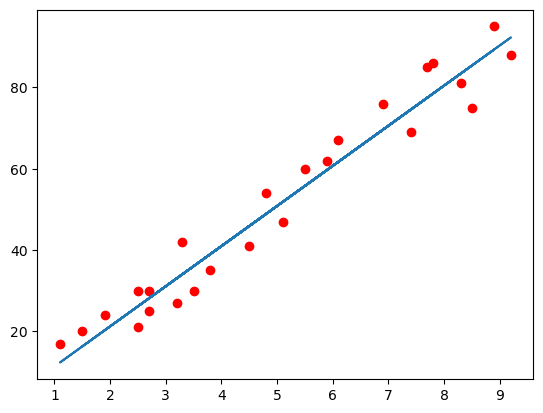

In [18]:
line=lm.intercept_+X*lm.coef_
plt.scatter(X,y,c='r')
plt.plot(X,line)
plt.show()

### Predicting the values from the test data

In [19]:
y_pred = lm.predict(X_test_lm)

### Creating a dataframe with actual and predicted values

In [20]:
df1 = pd.DataFrame({'Actual':y_test_lm,'Predicted':y_pred})
df1

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


### Finding error in the model

In [21]:
from sklearn import metrics
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test_lm, y_pred)))

Mean Absolute Error:4.762517892332275


# Predicting the score - What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hours = [[9.25]]
print('Expected_Score : ' + str(lm.predict(hours)[0]))

Expected_Score : 92.80850057353504


## The predicted Score will be "92.80850057353504"

# Task 1 Completed !!
## Thank you..